In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

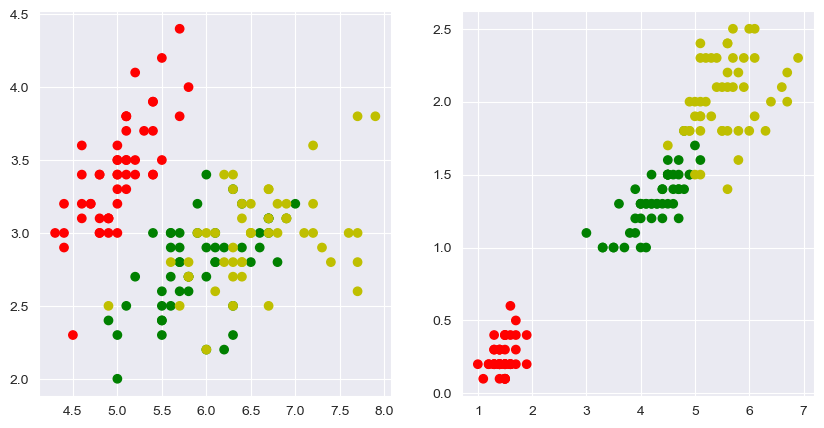

/Users/luojidong/anaconda3/envs/imooc_ai/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


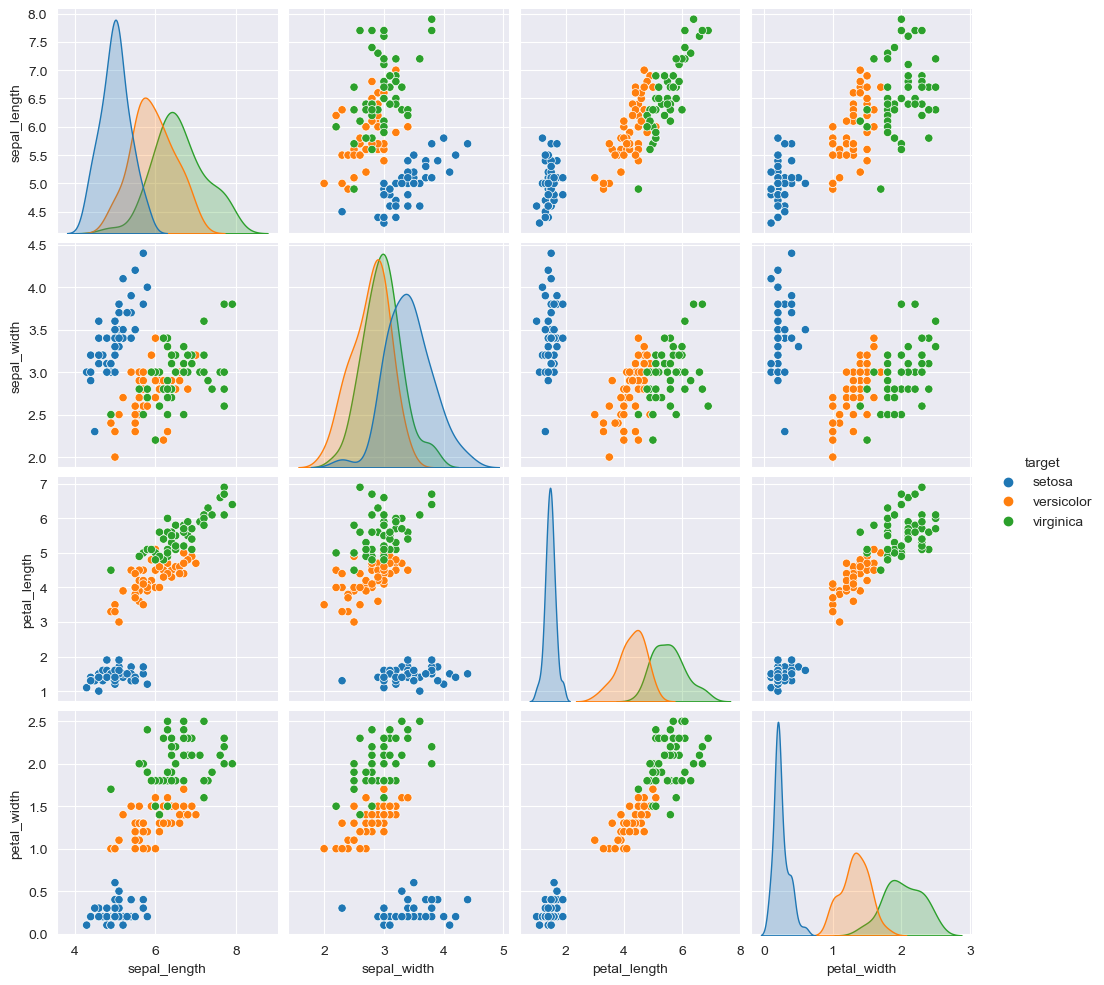

In [3]:
df=pd.read_csv("./20231009_data_file/iris_data.csv")
#製作一個字典準備將 target 轉成數值

target_mapping={"setosa":0,"versicolor":1, "virginica":2}

dataset=df.values
X=dataset[:,0:4]
Y=df["target"].map(target_mapping)
#print(Y)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

colmap=np.array(["r","g","y"])
plt.scatter(df["sepal_length"],df["sepal_width"],color=colmap[Y])
plt.subplot(1,2,2)
plt.scatter(df["petal_length"],df["petal_width"],color=colmap[Y])
plt.show()

sns.pairplot(df,hue="target")

In [5]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)
df=pd.read_csv("./20231009_data_file/iris_data.csv")

In [6]:
target_mapping={"setosa" : 0,
                "versicolor" : 1,
                "virginica" : 2}
df["target"] = df["target"].map(target_mapping)
dataset = df.values
np.random.shuffle(dataset)
# 分割特徵和標籤資料
X = dataset[:,0:4].astype(float)
Y = to_categorical(dataset[:,4])
# 特徵標準化 (第0維度->變1維)
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試集
X_train = X[:120,:]
Y_train = Y[:120]
X_test = X[120:,:]
Y_test = Y[120:]

In [15]:
model = Sequential()
#4_input*6_w+6_bias=30 parameters
model.add(Dense(6, input_shape=(4,),activation="relu"))
#6_input*6_w+6_bias=42 parameters
model.add(Dense(6,activation="relu"))
#6_input*3_output+3_bias=21 parameters
model.add(Dense(3,activation="softmax"))
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 30        
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 3)                 21        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


Training ...
1/1 [==============================] - 0s 45ms/step - loss: 0.0751 - accuracy: 0.9667
準確度 = 0.966667


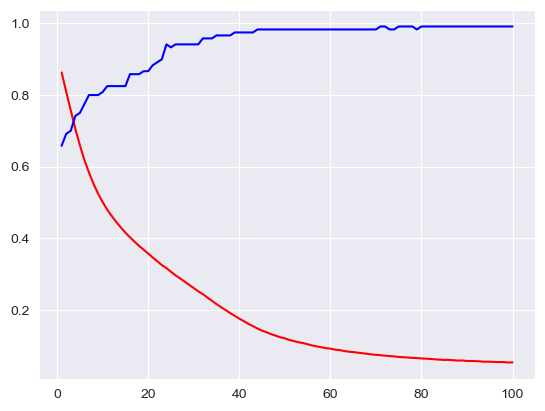

In [16]:
#訓練模型
print("Training ...")
train_result = model.fit(X_train,Y_train,epochs=100,verbose=0, batch_size=5)

loss, accuracy = model.evaluate(X_test,Y_test)
print("準確度 = {:2f}".format(accuracy))

train_accuracy = train_result.history["accuracy"]
train_loss = train_result.history["loss"]

epochs = range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,"r")
plt.plot(epochs,train_accuracy,"b")